<a href="https://colab.research.google.com/github/DanielaRojasS/TrabajodeAcomp/blob/master/BajoPesoNacer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# cargar el archivo
url = '/content/BajoPesoNacerModificado.csv'
df = pd.read_csv(url)


# Inspeccionar las columnas del DataFrame
print("Columnas del DataFrame:")
print(df.columns)

Columnas del DataFrame:
Index(['id', 'semana', 'edad_', 'uni_med_', 'sexo_', 'nombre_barrio', 'comuna',
       'tipo_ss_', 'cod_ase_', 'fec_con_', 'ini_sin_', 'tip_cas_', 'pac_hos_',
       'peso_nacer', 'talla_nacer', 'sem_gest', 'niv_edu_ma', 'evento',
       'year_', 'nueva_columna_sexo', 'numero_comuna', 'numero_tipo_ss_',
       'rango_edad_'],
      dtype='object')


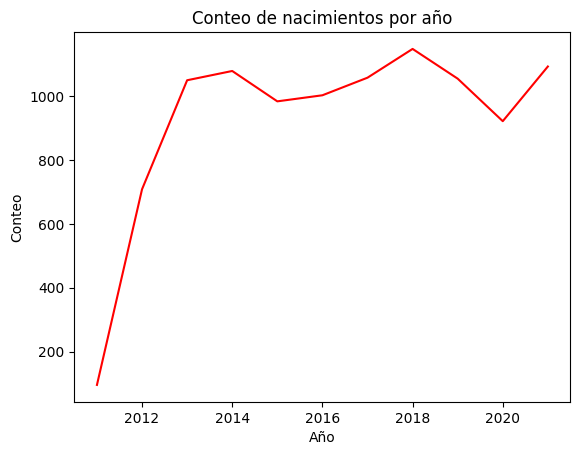

year_
2011      96
2012     708
2013    1049
2014    1078
2015     983
2016    1002
2017    1057
2018    1147
2019    1054
2020     921
2021    1092
dtype: int64


In [2]:
# nacimientos por año
conteo_año = df.groupby(['year_']).size()

# gráfico de líneas
plt.plot(conteo_año.index, conteo_año.values, color='red')
plt.xlabel('Año')
plt.ylabel('Conteo')
plt.title('Conteo de nacimientos por año')
plt.show()

print(conteo_año)


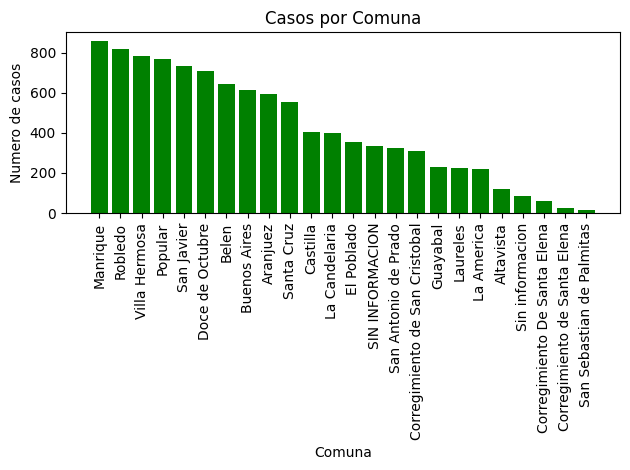

comuna
Manrique                          858
Robledo                           820
Villa Hermosa                     784
Popular                           768
San Javier                        733
Doce de Octubre                   710
Belen                             644
Buenos Aires                      613
Aranjuez                          595
Santa Cruz                        552
Castilla                          405
La Candelaria                     400
El Poblado                        356
SIN INFORMACION                   334
San Antonio de Prado              323
Corregimiento de San Cristobal    309
Guayabal                          231
Laureles                          226
La America                        220
Altavista                         120
Sin informacion                    86
Corregimiento De Santa Elena       61
Corregimiento de Santa Elena       26
San Sebastian de Palmitas          13
Name: count, dtype: int64


In [3]:
# ordenar por ascendencia (o descendencia)
df = df.sort_values(by='comuna', ascending=True)
conteo_comuna = df['comuna'].value_counts()

# grafico de barras
plt.bar(conteo_comuna.index, conteo_comuna.values, color='green')
plt.xlabel('Comuna')
plt.ylabel('Numero de casos')
plt.title('Casos por Comuna')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(conteo_comuna)

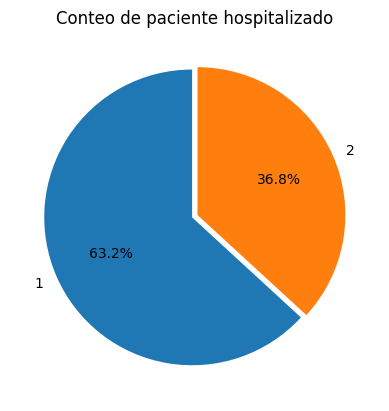

pac_hos_
1    6435
2    3752
Name: count, dtype: int64


In [5]:
# conteo de paciente hospitalizado 1=si 2=no
conteo_pac_hos_ = df['pac_hos_'].value_counts()

# grafico de torta
plt.pie(conteo_pac_hos_, labels=conteo_pac_hos_.index, autopct='%1.1f%%',
        startangle=90, explode=[0.02] * len(conteo_pac_hos_))
plt.title('Conteo de paciente hospitalizado')
plt.show()
print(conteo_pac_hos_)

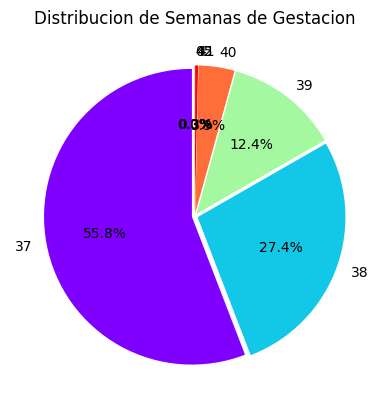

sem_gest
37    5689
38    2796
39    1265
40     401
41      32
0        2
42       1
45       1
Name: count, dtype: int64


In [6]:
# grafico de tortas semana de gestacion
conteo_sem_gest_ = df['sem_gest'].value_counts()

plt.pie(conteo_sem_gest_, labels=conteo_sem_gest_.index, autopct='%1.1f%%',
        startangle=90, explode=[0.02] * len(conteo_sem_gest_),
        colors=cm.rainbow(np.linspace(0, 2, len(conteo_sem_gest_))))
plt.title('Distribucion de Semanas de Gestacion')

plt.show()
print(conteo_sem_gest_)

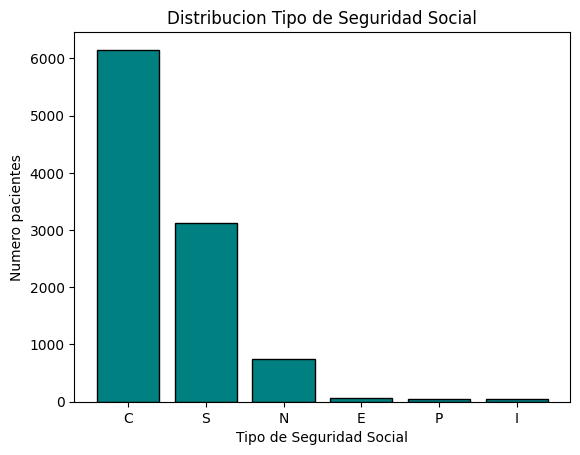

tipo_ss_
C    6151
S    3130
N     752
E      61
P      52
I      41
Name: count, dtype: int64


In [8]:
# distribucion tipo de seguridad social
conteo_tipo_ss_ = df['tipo_ss_'].value_counts()

# grafico barras
plt.bar(conteo_tipo_ss_.index, conteo_tipo_ss_.values, color='teal', edgecolor='black')
plt.xlabel('Tipo de Seguridad Social')
plt.ylabel('Numero pacientes')
plt.title('Distribucion Tipo de Seguridad Social')

plt.show()
print(conteo_tipo_ss_)

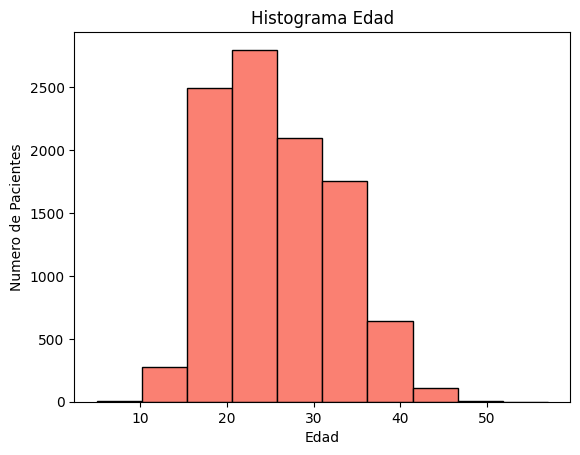

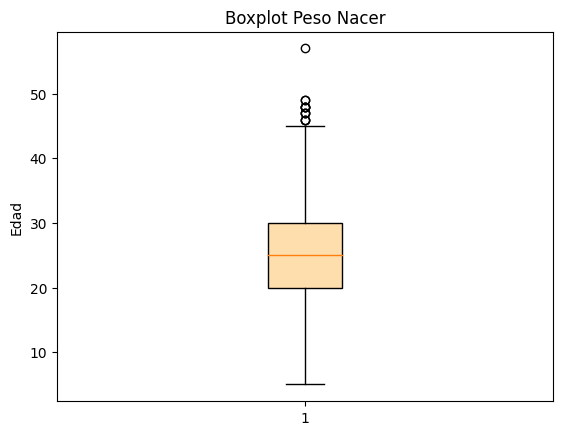

In [9]:
# histograma de edad
plt.hist(df['edad_'], bins=10, color='salmon', edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Numero de Pacientes')
plt.title('Histograma Edad')
plt.show()

# grafico caja de edad
plt.boxplot(df['edad_'], patch_artist=True, boxprops=dict(facecolor='navajowhite'))

plt.ylabel('Edad')
plt.title('Boxplot Peso Nacer')
plt.show()

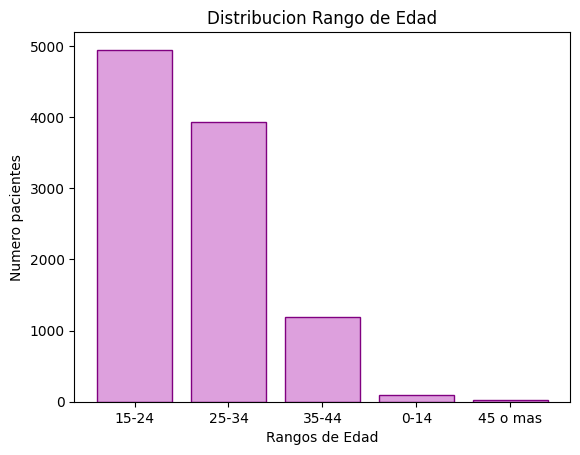

  Rango de edad  Conteo Rango de edad  Porcentaje
0         15-24                  4946   48.552076
1         25-34                  3934   38.617846
2         35-44                  1191   11.691371
3          0-14                    96    0.942378
4      45 o mas                    20    0.196329


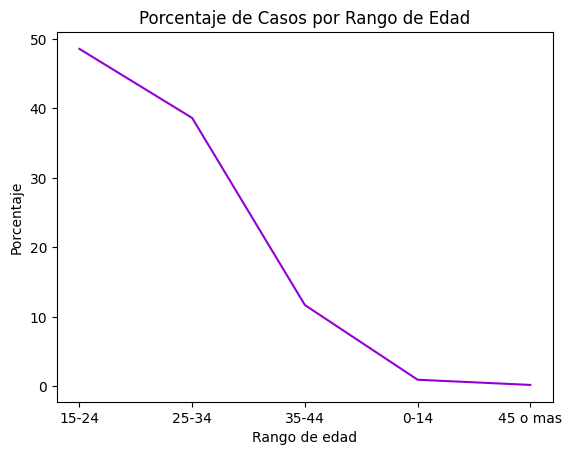

In [11]:
# contar valores de rango de edad
conteo_rango_edad = df['rango_edad_'].value_counts()

# grafico de barras con rango de edad
plt.bar(conteo_rango_edad.index, conteo_rango_edad.values, color='plum', edgecolor='purple')
plt.xlabel('Rangos de Edad')
plt.ylabel('Numero pacientes')
plt.title('Distribucion Rango de Edad')
plt.show()

# calcular el porcentaje de casos en cada rango de edad
porcentajes_rango_edad = (conteo_rango_edad / conteo_rango_edad.sum()) * 100

# tabla con rangos de edad y porcentajes
tabla_rango_edad = pd.DataFrame({
    'Rango de edad': conteo_rango_edad.index,
    'Conteo Rango de edad': conteo_rango_edad.values,
    'Porcentaje': porcentajes_rango_edad.values})

print(tabla_rango_edad.to_string())

#grafico lineas con porcentajes de rango de edad
plt.plot(tabla_rango_edad['Rango de edad'], tabla_rango_edad['Porcentaje'],color='darkviolet')
plt.xlabel('Rango de edad')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Casos por Rango de Edad')
plt.show()

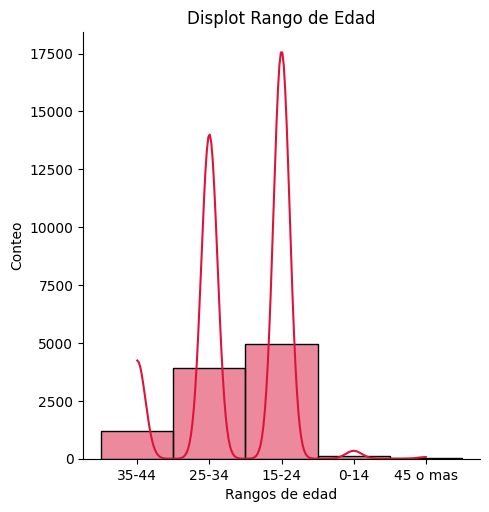

In [14]:
# displot con searborn

sns.displot(df['rango_edad_'], kde= True, color='crimson')

plt.xlabel('Rangos de edad')
plt.ylabel('Conteo')
plt.title('Displot Rango de Edad')
plt.show()

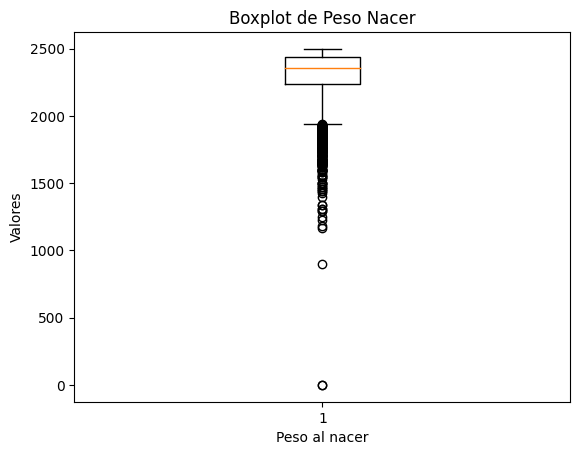

In [18]:
# grafico de caja peso nacer
plt.boxplot(df['peso_nacer'])

plt.xlabel('Peso al nacer')
plt.ylabel('Valores')
plt.title('Boxplot de Peso Nacer')
plt.show()

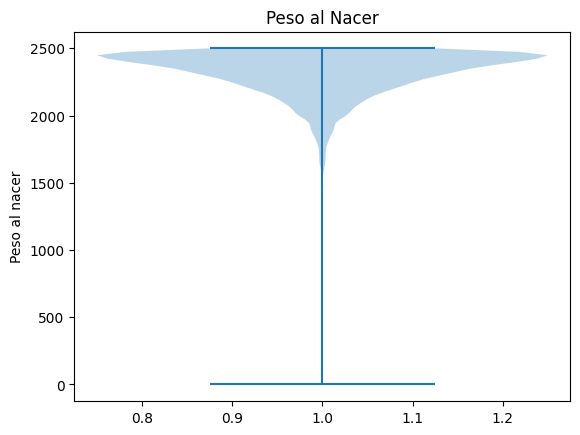

peso_nacer
2450    371
2400    369
2480    364
2490    352
2460    351
       ... 
2114      1
2181      1
1955      1
1972      1
2058      1
Name: count, Length: 541, dtype: int64


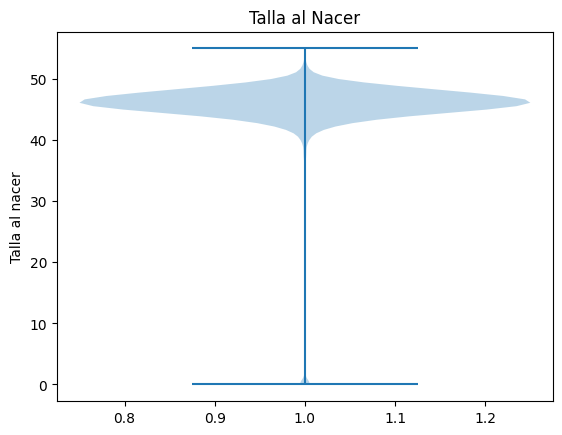

talla_nacer
46    2210
47    2011
45    1732
48    1373
44     934
49     737
43     447
50     211
42     193
0       87
41      67
51      55
40      37
52      24
38      13
37      12
39      10
33       6
53       5
32       4
35       4
30       3
31       3
34       3
54       2
55       2
36       2
Name: count, dtype: int64


In [19]:
# grafico violin con peso nacer
plt.violinplot(df['peso_nacer'])

plt.ylabel('Peso al nacer')
plt.title('Peso al Nacer')
plt.show()

conteo_peso_nacer = df['peso_nacer'].value_counts()
print(conteo_peso_nacer)

# grafico violin con talla nacer
plt.violinplot(df['talla_nacer'])

plt.ylabel('Talla al nacer')
plt.title('Talla al Nacer')
plt.show()

conteo_talla_nacer = df['talla_nacer'].value_counts()
print(conteo_talla_nacer)

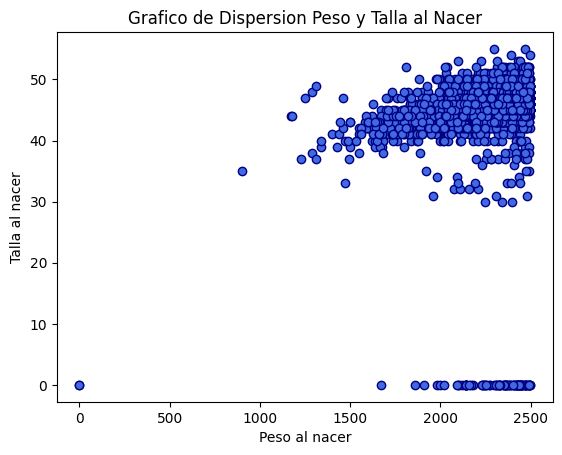

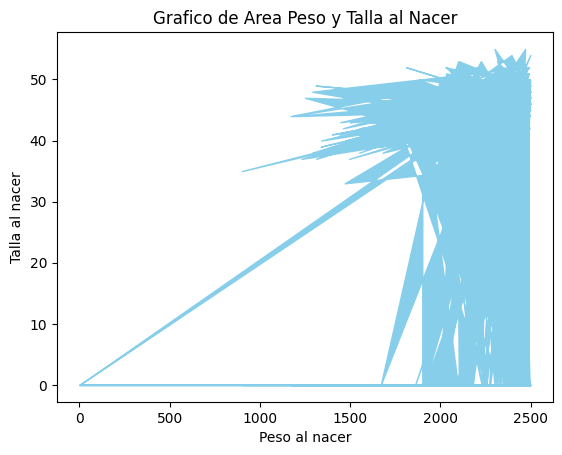

In [20]:
# grafico de dispersion
plt.scatter(df['peso_nacer'], df['talla_nacer'],color='royalblue',edgecolor='navy')

plt.xlabel('Peso al nacer')
plt.ylabel('Talla al nacer')
plt.title('Grafico de Dispersion Peso y Talla al Nacer')
plt.show()

# grafico de area
plt.fill_between(df['peso_nacer'], df['talla_nacer'], color='skyblue')

plt.xlabel('Peso al nacer')
plt.ylabel('Talla al nacer')
plt.title('Grafico de Area Peso y Talla al Nacer')
plt.show()

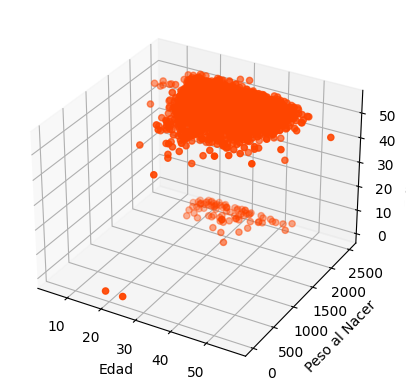

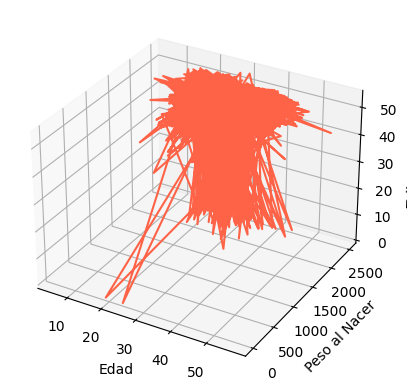

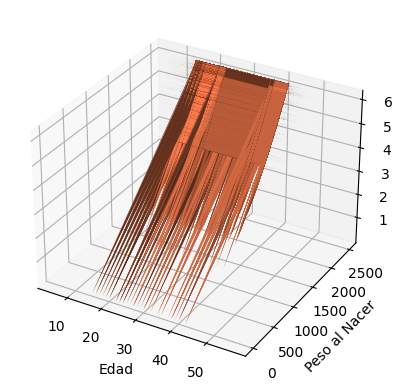

In [21]:
# grafico de dispersion 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['edad_'], df['peso_nacer'],df['talla_nacer'], color='orangered')
ax.set_xlabel('Edad')
ax.set_ylabel('Peso al Nacer')
ax.set_zlabel('Talla al Nacer')

# grafico de lineas 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['edad_']
y = df['peso_nacer']
z = df['talla_nacer']

ax.plot3D(x, y, z, color='tomato')
ax.set_xlabel('Edad')
ax.set_ylabel('Peso al Nacer')
ax.set_zlabel('Talla al Nacer')

# trazado de superficie 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

ax.plot_surface(X, Y, Z, color='coral')
ax.set_xlabel('Edad')
ax.set_ylabel('Peso al Nacer')
ax.set_zlabel('Talla al Nacer')
plt.show()

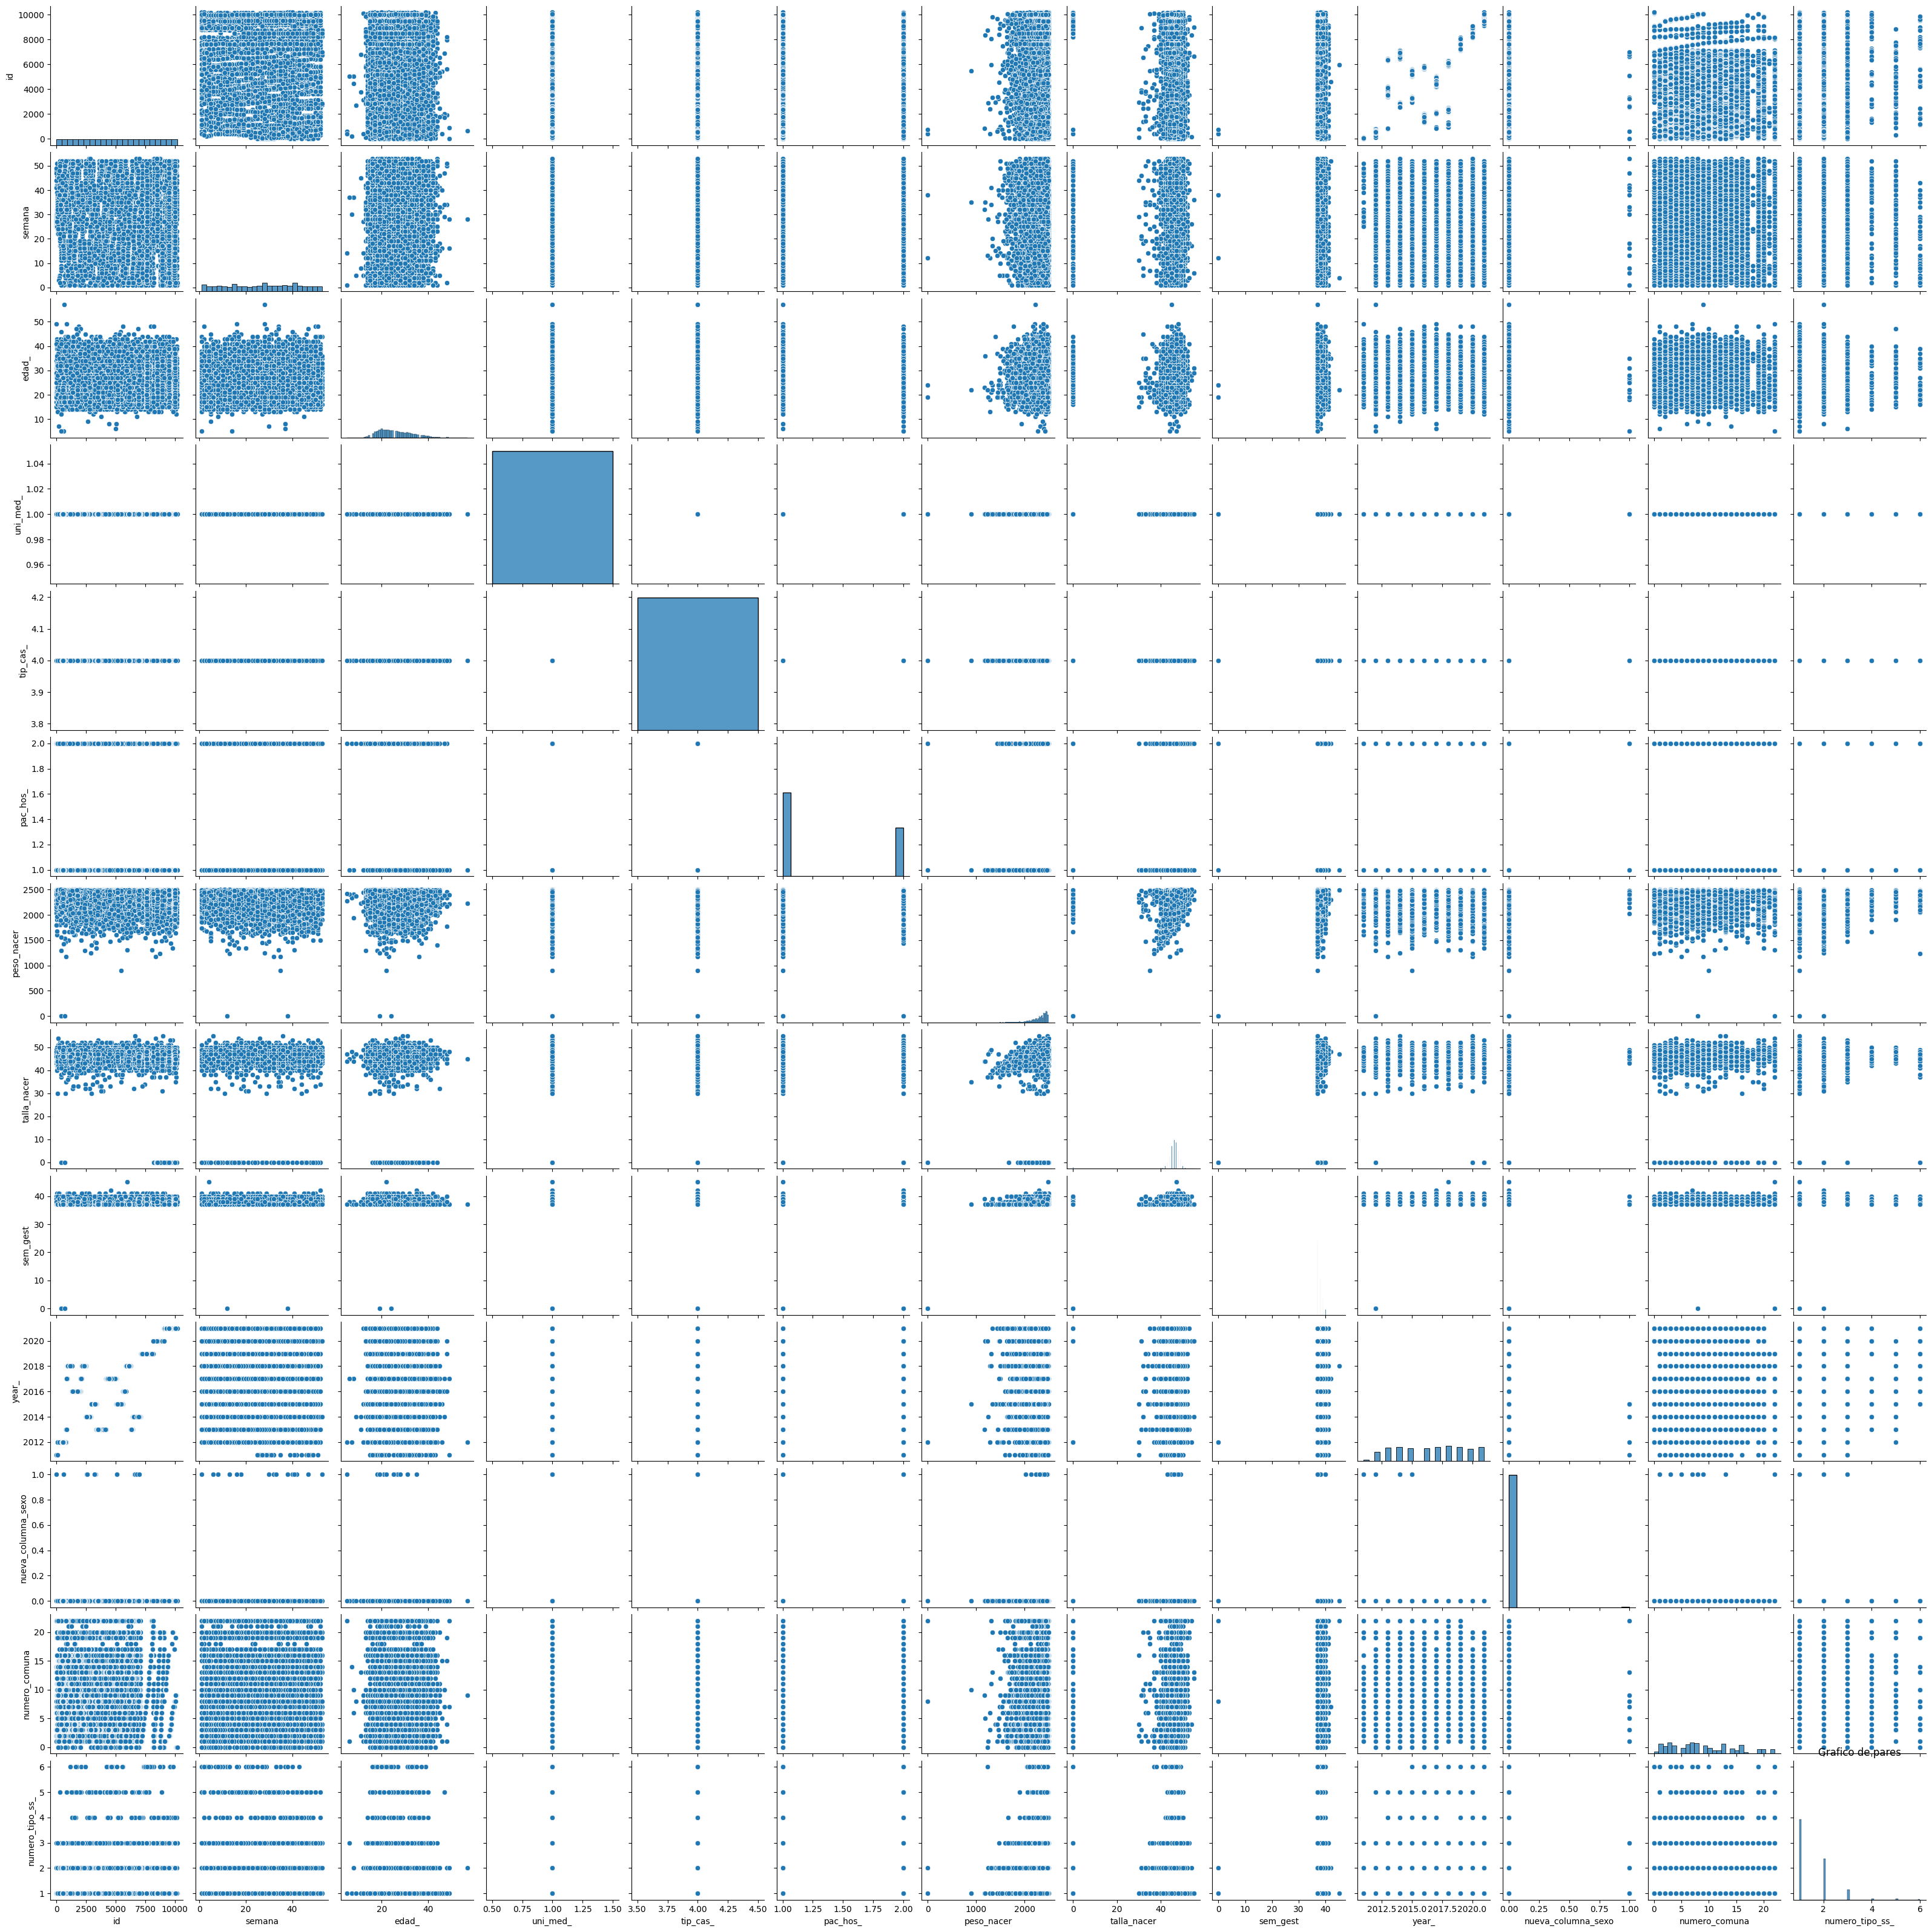

In [22]:
# grafico de pares
sns.pairplot(df)
plt.title('Grafico de pares')
plt.show()
